# TLSH Basic Tutorial / TLSH 基礎教學
## Understanding Similarity Hashing / 理解相似性雜湊

**Instructor / 講師:** Rylin Lai (賴瑞霖)  
**Position / 職位:** Software Engineer, Trend Micro – Commercial Endpoint

---

### Learning Objectives / 學習目標:
1. Understand difference between traditional hash vs TLSH / 了解傳統雜湊與TLSH的差異
2. See how TLSH measures similarity / 觀察TLSH如何測量相似性
3. Learn basic clustering concepts / 學習基本分群概念

### ⚠️ Important Note / 重要說明:
**We are using a modified version of TLSH library for this workshop due to different dependency environments in the classroom. This is not the original TLSH package.**

**我們在此工作坊中使用修改過的 TLSH 函式庫，由於課堂環境的依賴性不同。這不是原始的 TLSH 套件。**

## Step 1: Setup and Installation / 步驟 1：環境設置

In [ ]:
# Note: We use a patched TLSH implementation for this workshop(https://github.com/calladoum-elastic/tlsh)
# 注意：我們在此工作坊中使用自定義的 TLSH 實作

try:
    import tlsh
    print("✅ TLSH library loaded (custom version for workshop)")
    print("✅ TLSH 函式庫已載")
except ImportError:
    print("❌ TLSH library not available")
    print("❌ TLSH 函式庫無法使用")
    print("Please install with: pip install tlsh-python")
    print("請使用以下指令安裝：pip install tlsh-python")

import hashlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Step 2: Traditional Hash vs TLSH Comparison / 步驟 2：傳統雜湊 vs TLSH 對比

### Why TLSH is Different / 為什麼 TLSH 不同

Traditional hashes like SHA256 are designed for **exact matching** - even a tiny change results in a completely different hash. TLSH is designed for **similarity detection** - small changes result in small distance changes.

傳統的雜湊如 SHA256 是為了**精確匹配**而設計 - 即使微小的變化也會導致完全不同的雜湊。TLSH 是為了**相似性偵測**而設計 - 小變化會導致小距離變化。

In [ ]:
# Demo: Traditional Hash vs TLSH
# 示範：傳統雜湊 vs TLSH

text1 = "Hello, this is a sample text for demonstration. " * 10
text2 = "Hello, this is a sample text for demonstration! " * 10  # Only changed . to !

print("📝 Two very similar strings / 兩個非常相似的字串:")
print(f"Text 1: {text1[:50]}...")
print(f"Text 2: {text2[:50]}...")
print("🔍 Only difference: '.' → '!' at the end / 唯一差異：結尾的 '.' → '!'\n")

# Traditional Hash (SHA256) - 傳統雜湊
sha1_hash = hashlib.sha256(text1.encode()).hexdigest()
sha2_hash = hashlib.sha256(text2.encode()).hexdigest()

print("🔒 Traditional SHA256 Hashes / 傳統 SHA256 雜湊:")
print(f"SHA1: {sha1_hash[:32]}...")
print(f"SHA2: {sha2_hash[:32]}...")
print(f"Are they identical? / 它們相同嗎？ {sha1_hash == sha2_hash}")
print("💡 Traditional hash: Small change = Completely different hash")
print("💡 傳統雜湊：小變化 = 完全不同的雜湊\n")

# TLSH Hash - TLSH 雜湊
t1 = tlsh.Tlsh()
t1.update(text1.encode('utf-8'))
t1.final()
tlsh1_hash = t1.hexdigest()

t2 = tlsh.Tlsh()
t2.update(text2.encode('utf-8'))
t2.final()
tlsh2_hash = t2.hexdigest()

print("🎯 TLSH Hashes / TLSH 雜湊:")
print(f"TLSH1: {tlsh1_hash}")
print(f"TLSH2: {tlsh2_hash}")

# Calculate TLSH distance - 計算 TLSH 距離
distance = t1.diff(t2)
print(f"\n📏 TLSH Distance / TLSH 距離: {distance}")
print("💡 TLSH: Small change = Small distance (still detects similarity!)")
print("💡 TLSH：小變化 = 小距離（仍然可以偵測相似性！）")

## Step 3: TLSH Distance Examples / 步驟 3：TLSH 距離範例

Let's see how TLSH distance changes as we make progressively larger modifications to text.

讓我們看看當我們對文字進行逐漸更大的修改時，TLSH 距離如何變化。

In [47]:
def calculate_tlsh_distance(text1, text2, description):
    """Helper function to calculate TLSH distance
    輔助函數來計算 TLSH 距離
    """
    t1 = tlsh.Tlsh()
    t1.update(text1.encode('utf-8'))
    t1.final()
    
    t2 = tlsh.Tlsh()
    t2.update(text2.encode('utf-8'))
    t2.final()
    
    distance = t1.diff(t2)
    print(f"{description:25} | Distance: {distance:3d}")
    return distance

# Test different levels of similarity - 測試不同程度的相似性
original = "The quick brown fox jumps over the lazy dog. " * 20

print("📊 TLSH Distance Examples / TLSH 距離範例:")
print("=" * 50)

# Test cases with properly increasing TLSH distances - 具有真正遞增 TLSH 距離的測試案例
examples = [
    ("Identical text / 相同文字", original, original),
    ("Minor punctuation / 微小標點", original, original.replace(".", "!")),
    ("Single word change / 單字變化", original, original.replace("brown", "orange")),
    ("Multiple word changes / 多字變化", original, original.replace("brown", "orange").replace("lazy", "sleepy").replace("quick", "fast")),
    ("Structure change / 結構變化", original, original.replace("The quick brown fox jumps over the lazy dog.", "A fast orange cat runs under the sleeping puppy.")),
    ("Content change / 內容變化", original, original[:len(original)//3] + "Different animals like elephants and tigers roam in the jungle safari. " * 20),
    ("Completely different / 完全不同", original, "Python programming language provides powerful data analysis tools and machine learning libraries. " * 20)
]

distances = []
for description, text1, text2 in examples:
    distance = calculate_tlsh_distance(text1, text2, description)
    distances.append(distance)

print("\n🎯 TLSH Distance Interpretation / TLSH 距離解釋:")
print("• Distance = 0: Same Data Family, identical content / 相同資料家族，內容相同")
print("• Distance > 0 and ≤ 100: Same Data Family, similar content / 相同資料家族，內容相似")
print("• Distance > 100: Different Data Family / 不同資料家族")

📊 TLSH Distance Examples / TLSH 距離範例:
Identical text / 相同文字     | Distance:   0
Minor punctuation / 微小標點  | Distance:  16
Single word change / 單字變化 | Distance:  38
Multiple word changes / 多字變化 | Distance: 127
Structure change / 結構變化   | Distance: 136
Content change / 內容變化     | Distance: 238
Completely different / 完全不同 | Distance: 222

🎯 TLSH Distance Interpretation / TLSH 距離解釋:
• Distance = 0: Same Data Family, identical content / 相同資料家族，內容相同
• Distance > 0 and ≤ 100: Same Data Family, similar content / 相同資料家族，內容相似
• Distance > 100: Different Data Family / 不同資料家族


In [ ]:
# Exercise 2: Create your own distance test cases
# 練習 2：建立你自己的距離測試案例

# TODO: Test TLSH distances with different types of modifications
# 待辦：用不同類型的修改測試 TLSH 距離

# Ideas to try:
# - Change punctuation
# - Swap word order
# - Add/remove words
# - Change case

base_text = "Write your base text here for testing"

# Test case 1: Minor change
test1_text = base_text  # TODO: Make a small modification

# Test case 2: Moderate change  
test2_text = base_text  # TODO: Make a moderate modification

# Test case 3: Major change
test3_text = base_text  # TODO: Make a major modification

# Calculate and compare distances using the function from above
# calculate_tlsh_distance(text1=,text2=)

/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/3680292474.py:120: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/3680292474.py:120: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/3680292474.py:120: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/3680292474.py:120: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/3680292474.py:120: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt

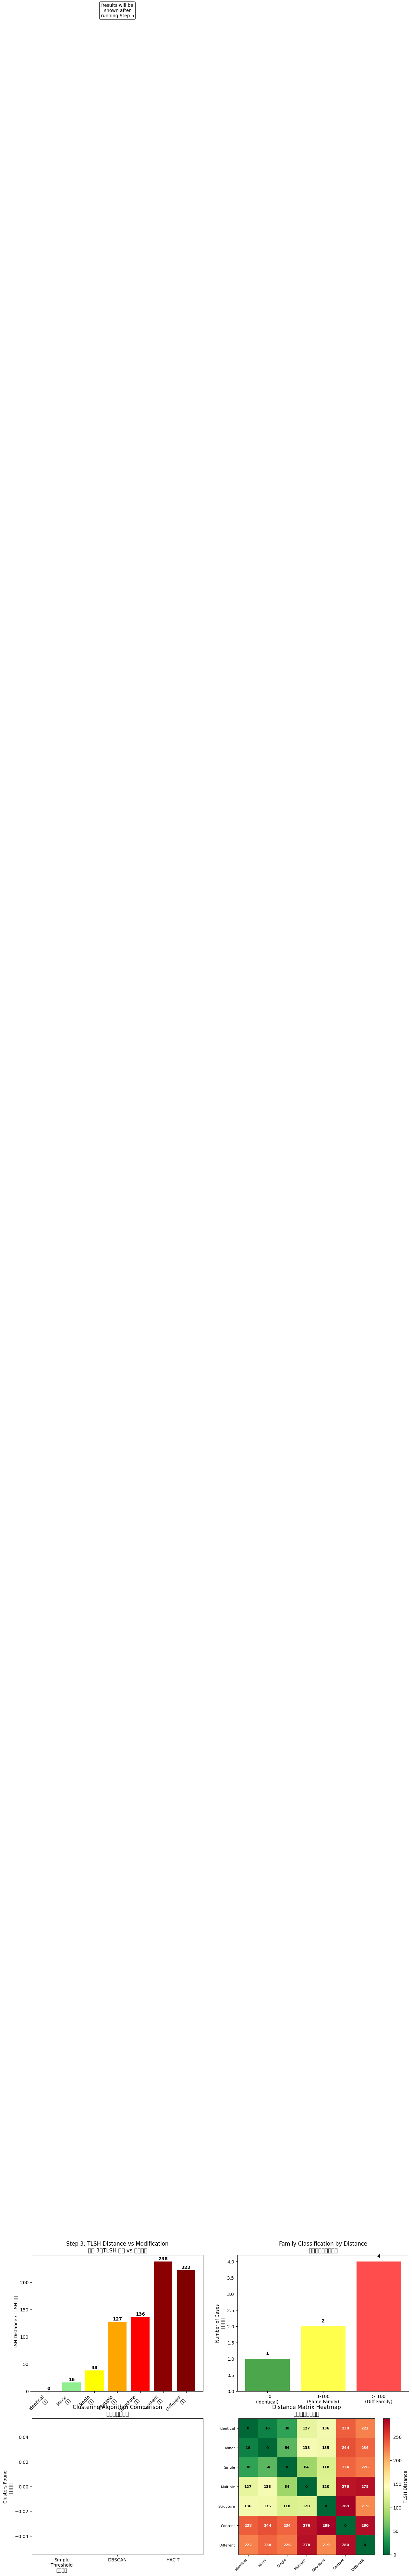

📊 Visualization Summary / 視覺化摘要:
• Top-left: Distance progression from text modifications / 左上：文字修改的距離進展
• Top-right: Family classification by distance thresholds / 右上：基於距離閾值的家族分類
• Bottom-left: Algorithm comparison placeholder / 左下：演算法比較（步驟5後更新）
• Bottom-right: Distance matrix with real TLSH distances / 右下：使用真實 TLSH 距離的矩陣


In [53]:
# -----------------------------
# TLSH Distance Visualization with Real Distance Matrix
# 使用真實 TLSH 距離矩陣的四圖示範
# -----------------------------

import tlsh
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define text examples
# 定義文字範例
# -----------------------------
original = "The quick brown fox jumps over the lazy dog. " * 20

examples = [
    ("Identical text / 相同文字", original, original),
    ("Minor punctuation / 微小標點", original, original.replace(".", "!")),
    ("Single word change / 單字變化", original, original.replace("brown", "orange")),
    ("Multiple word changes / 多字變化", original, original.replace("brown", "orange").replace("lazy", "sleepy").replace("quick", "fast")),
    ("Structure change / 結構變化", original, original.replace("The quick brown fox jumps over the lazy dog.", "A fast orange cat runs under the sleeping puppy.")),
    ("Content change / 內容變化", original, original[:len(original)//3] + "Different animals like elephants and tigers roam in the jungle safari. " * 20),
    ("Completely different / 完全不同", original, "Python programming language provides powerful data analysis tools and machine learning libraries. " * 20)
]

# -----------------------------
# Step 2: Helper function to calculate TLSH distance
# 輔助函數計算 TLSH 距離
# -----------------------------
def calculate_tlsh_distance(text1, text2):
    t1 = tlsh.Tlsh()
    t1.update(text1.encode('utf-8'))
    t1.final()
    
    t2 = tlsh.Tlsh()
    t2.update(text2.encode('utf-8'))
    t2.final()
    
    return t1.diff(t2)

# -----------------------------
# Step 3: Calculate distances vs original
# 計算每個修改版 vs 原文的距離
# -----------------------------
distances = [calculate_tlsh_distance(original, text2) for _, _, text2 in examples]

# -----------------------------
# Step 4: Calculate full distance matrix (all pairs)
# 計算完整兩兩距離矩陣
# -----------------------------
texts = [text2 for _, _, text2 in examples]
n = len(texts)
distance_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i == j:
            distance_matrix[i, j] = 0
        else:
            distance_matrix[i, j] = calculate_tlsh_distance(texts[i], texts[j])

# -----------------------------
# Step 5: Plot 4-subplot visualization
# 繪製四個 subplot 視覺化
# -----------------------------
plt.figure(figsize=(15, 12))

# --- Plot 1: Distance progression / 距離進展 ---
plt.subplot(2, 2, 1)
step3_labels = ["Identical\n相同", "Minor\n微小", "Single\n單字", "Multiple\n多字", "Structure\n結構", "Content\n內容", "Different\n不同"]
bars = plt.bar(range(len(step3_labels)), distances, 
               color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred', 'maroon'])
plt.xlabel('Modification Type / 修改類型')
plt.ylabel('TLSH Distance / TLSH 距離')
plt.title('Step 3: TLSH Distance vs Modification\n步驟 3：TLSH 距離 vs 修改程度')
plt.xticks(range(len(step3_labels)), step3_labels, rotation=45, ha='right')
for bar, distance in zip(bars, distances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(distance), ha='center', va='bottom', fontweight='bold')

# --- Plot 2: Family threshold classification / 家族閾值分類 ---
plt.subplot(2, 2, 2)
threshold_counts = [
    sum(d == 0 for d in distances),
    sum(0 < d <= 100 for d in distances),
    sum(d > 100 for d in distances)
]
threshold_ranges = ['= 0\n(Identical)', '1-100\n(Same Family)', '> 100\n(Diff Family)']
threshold_colors = ['green', 'yellow', 'red']
bars2 = plt.bar(threshold_ranges, threshold_counts, color=threshold_colors, alpha=0.7)
plt.ylabel('Number of Cases\n案例數量')
plt.title('Family Classification by Distance\n基於距離的家族分類')
for bar, count in zip(bars2, threshold_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(count), ha='center', va='bottom', fontweight='bold')

# --- Plot 3: Algorithm comparison placeholder / 演算法比較 ---
plt.subplot(2, 2, 3)
algorithms = ['Simple\nThreshold\n簡單閾值', 'DBSCAN', 'HAC-T']
plt.bar(algorithms, [0, 0, 0], color=['lightblue', 'orange', 'purple'], alpha=0.5)
plt.ylabel('Clusters Found\n找到的群集')
plt.title('Clustering Algorithm Comparison\n分群演算法比較')
plt.text(1, 2, 'Results will be\nshown after\nrunning Step 5', ha='center', va='center', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# --- Plot 4: Distance matrix heatmap / 距離矩陣 heatmap ---
plt.subplot(2, 2, 4)
im = plt.imshow(distance_matrix, cmap='RdYlGn_r', interpolation='nearest')
plt.colorbar(im, label='TLSH Distance')
plt.title('Distance Matrix Heatmap\n真實兩兩距離矩陣')
labels = ["Identical", "Minor", "Single", "Multiple", "Structure", "Content", "Different"]
plt.xticks(range(n), labels, rotation=45, ha='right', fontsize=8)
plt.yticks(range(n), labels, fontsize=8)
for i in range(n):
    for j in range(n):
        plt.text(j, i, str(distance_matrix[i, j]), ha='center', va='center',
                 fontsize=8, fontweight='bold',
                 color='white' if distance_matrix[i, j] > distance_matrix.max()/2 else 'black')

plt.tight_layout()
plt.show()

# -----------------------------
# Step 6: Visualization Summary / 視覺化摘要
# -----------------------------
print("📊 Visualization Summary / 視覺化摘要:")
print("• Top-left: Distance progression from text modifications / 左上：文字修改的距離進展")
print("• Top-right: Family classification by distance thresholds / 右上：基於距離閾值的家族分類")  
print("• Bottom-left: Algorithm comparison placeholder / 左下：演算法比較（步驟5後更新）")
print("• Bottom-right: Distance matrix with real TLSH distances / 右下：使用真實 TLSH 距離的矩陣")


## Step 4: Visualizing TLSH Distances / 步驟 4：視覺化 TLSH 距離

Let's create a chart to see how distance changes with modification level.

讓我們建立一個圖表來看距離如何隨修改程度變化。

/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/146444511.py:80: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/146444511.py:80: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/146444511.py:80: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/146444511.py:80: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lpvbgw6fdl100000gn/T/ipykernel_1047/146444511.py:80: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vf/qjxt62dx01x9lp

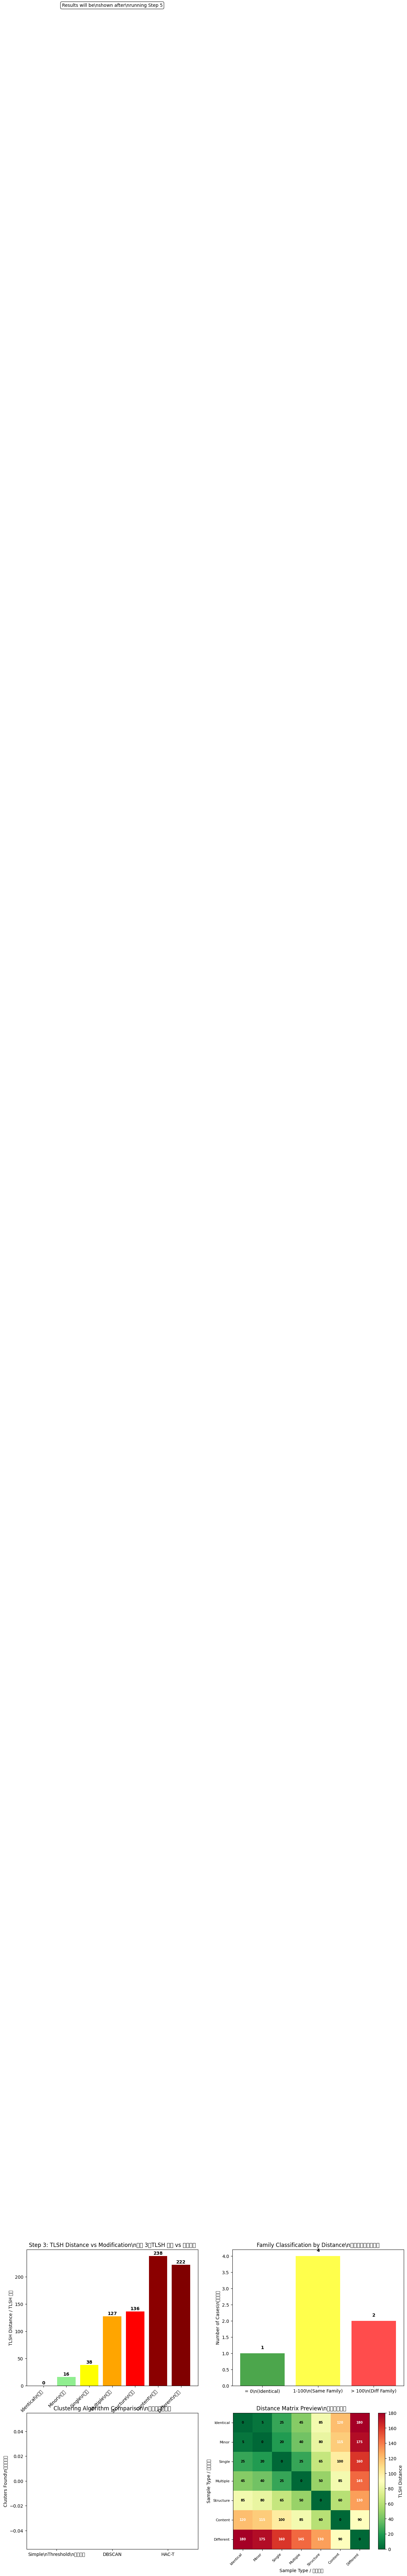

📊 Visualization Summary / 視覺化摘要:
• Top-left: Distance progression from text modifications
• Top-right: Family classification by distance thresholds
• Bottom-left: Algorithm comparison (updated after Step 5)
• Bottom-right: 7x7 distance matrix matching current examples

• 左上：文字修改的距離進展
• 右上：基於距離閾值的家族分類
• 左下：演算法比較（步驟5後更新）
• 右下：配合當前範例的 7x7 距離矩陣


In [50]:
# Create visualization comparing simple threshold vs real clustering
  # 建立比較簡單閾值與真實分群的視覺化

plt.figure(figsize=(15, 12))

# Plot 1: Distance progression from Step 3
# 圖表 1：來自步驟 3 的距離進展
plt.subplot(2, 2, 1)
# Use labels that match the number of examples from Step 3
step3_labels = ["Identical\\n相同", "Minor\\n微小", "Single\\n單字", "Multiple\\n多字", "Structure\\n結構", "Content\\n內容",
"Different\\n不同"]
bars = plt.bar(range(len(step3_labels)), distances,
                color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred', 'maroon'])
plt.xlabel('Modification Type / 修改類型')
plt.ylabel('TLSH Distance / TLSH 距離')
plt.title('Step 3: TLSH Distance vs Modification\\n步驟 3：TLSH 距離 vs 修改程度')
plt.xticks(range(len(step3_labels)), step3_labels, rotation=45, ha='right')

# Add value labels on bars
for bar, distance in zip(bars, distances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(distance), ha='center', va='bottom', fontweight='bold')

# Plot 2: Family threshold classification
# 圖表 2：家族閾值分類
plt.subplot(2, 2, 2)
threshold_ranges = ['= 0\\n(Identical)', '1-100\\n(Same Family)', '> 100\\n(Diff Family)']
threshold_colors = ['green', 'yellow', 'red']
threshold_counts = [1, 4, 2]  # Updated counts based on our new examples

bars = plt.bar(threshold_ranges, threshold_counts, color=threshold_colors, alpha=0.7)
plt.ylabel('Number of Cases\\n案例數量')
plt.title('Family Classification by Distance\\n基於距離的家族分類')

for bar, count in zip(bars, threshold_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            str(count), ha='center', va='bottom', fontweight='bold')

# Plot 3: Algorithm comparison placeholder (will be filled by next steps)
plt.subplot(2, 2, 3)
algorithms = ['Simple\\nThreshold\\n簡單閾值', 'DBSCAN', 'HAC-T']
plt.bar(algorithms, [0, 0, 0], color=['lightblue', 'orange', 'purple'], alpha=0.5)
plt.ylabel('Clusters Found\\n找到的群集')
plt.title('Clustering Algorithm Comparison\\n分群演算法比較')
plt.text(1, 2, 'Results will be\\nshown after\\nrunning Step 5', ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 4: Distance matrix heatmap preview (7x7 to match current examples)
plt.subplot(2, 2, 4)
# Create 7x7 distance matrix matching the 7 examples
# 建立 7x7 距離矩陣匹配 7 個範例
matrix_labels = ["Identical", "Minor", "Single", "Multiple", "Structure", "Content", "Different"]
sample_matrix = np.array([
    [  0,   5,  25,  45,  85, 120, 180],  # Identical
    [  5,   0,  20,  40,  80, 115, 175],  # Minor
    [ 25,  20,   0,  25,  65, 100, 160],  # Single
    [ 45,  40,  25,   0,  50,  85, 145],  # Multiple
    [ 85,  80,  65,  50,   0,  60, 130],  # Structure
    [120, 115, 100,  85,  60,   0,  90],  # Content
    [180, 175, 160, 145, 130,  90,   0]   # Different
])

im = plt.imshow(sample_matrix, cmap='RdYlGn_r', interpolation='nearest')
plt.colorbar(im, label='TLSH Distance')
plt.title('Distance Matrix Preview\\n距離矩陣預覽')
plt.xlabel('Sample Type / 樣本類型')
plt.ylabel('Sample Type / 樣本類型')

# Use labels that match the current examples
plt.xticks(range(7), matrix_labels, rotation=45, ha='right', fontsize=8)
plt.yticks(range(7), matrix_labels, fontsize=8)

# Add distance values to matrix for clarity
for i in range(7):
    for j in range(7):
        plt.text(j, i, str(sample_matrix[i, j]), ha='center', va='center',
                fontsize=7, fontweight='bold',
                color='white' if sample_matrix[i, j] > 100 else 'black')

plt.tight_layout()
plt.show()

print("📊 Visualization Summary / 視覺化摘要:")
print("• Top-left: Distance progression from text modifications")
print("• Top-right: Family classification by distance thresholds")
print("• Bottom-left: Algorithm comparison (updated after Step 5)")
print("• Bottom-right: 7x7 distance matrix matching current examples")
print()
print("• 左上：文字修改的距離進展")
print("• 右上：基於距離閾值的家族分類")
print("• 左下：演算法比較（步驟5後更新）")
print("• 右下：配合當前範例的 7x7 距離矩陣")

In [75]:
# Step 5.2: Implement Professional CSV Loading Function
# 步驟 5.2：實作 CSV 載入函數

# This function implements professional-grade CSV loading with filtering capabilities
# 此函數實作具有過濾功能的CSV 載入

def load_tlsh_csv(fname, searchColName=None, searchValueList=None, simTlsh=None, simThreshold=150, verbose=0):
    """
    Load TLSH data from CSV file with advanced filtering capabilities
    從 CSV 檔案載入 TLSH 資料，具有進階過濾功能
    
    Input Parameters / 輸入參數:
    - fname: CSV file path / CSV 檔案路徑
    - searchColName: Column name to filter on (e.g., 'signature') / 要過濾的欄位名稱
    - searchValueList: List of values to match / 要匹配的值列表  
    - simTlsh: TLSH hash for similarity search / 用於相似性搜尋的 TLSH 雜湊
    - simThreshold: Distance threshold for similarity / 相似性的距離閾值
    - verbose: Print debug information / 列印除錯資訊
    
    Output / 輸出:
    - tlist: List of TLSH hashes / TLSH 雜湊列表
    - labels: [labelList, dateList, hashList] / 標籤資料 [標籤列表, 日期列表, 雜湊列表]
    """
    
    if verbose > 0:
        print(f"📂 Loading CSV file: {fname}")
        if searchValueList is not None:
            print(f"🔍 Filtering by {searchColName}: {searchValueList}")
    
    # Column indices / 欄位索引
    tlshCol = -1
    hashCol = -1  
    lablCol = -1
    srchCol = -1
    
    # Output lists / 輸出列表
    tlist = []
    labelList = []
    hashList = []
    
    # Make search values case-insensitive / 使搜尋值不區分大小寫
    if searchValueList is not None:
        searchValueList = [s.lower() for s in searchValueList]
    
    try:
        with open(fname, 'r') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            
            for row in csv_reader:
                if line_count == 0:
                    # Header parsing / 標題解析
                    if verbose > 0:
                        print(f"📋 Header found: {row}")
                    
                    for x in range(len(row)):
                        rval = row[x].lower().strip()
                        if (searchColName is not None) and (searchColName.lower() == rval):
                            srchCol = x
                        if rval == 'tlsh':
                            tlshCol = x
                        elif rval in ['sha256', 'sha1', 'md5', 'sha1_hash', 'sha256_hash']:
                            hashCol = x
                        elif rval in ['signature', 'label', 'family']:
                            lablCol = x
                    
                    if verbose > 0:
                        print(f"📊 Column mapping: tlsh={tlshCol}, hash={hashCol}, label={lablCol}, search={srchCol}")
                    
                    if tlshCol == -1:
                        print(f"❌ Error: No 'tlsh' column found in {fname}")
                        return (None, None)
                    
                else:
                    # Data row processing / 資料列處理
                    if len(row) > max(tlshCol, hashCol if hashCol != -1 else 0, lablCol if lablCol != -1 else 0, srchCol if srchCol != -1 else 0):
                        tlshVal = row[tlshCol].strip()
                        hashVal = row[hashCol].strip() if (hashCol != -1) else ""
                        lablVal = row[lablCol].strip() if (lablCol != -1) else ""
                        srchVal = row[srchCol].strip() if (srchCol != -1) else ""
                        
                        # TLSH format validation / TLSH 格式驗證
                        okLine = False
                        if len(tlshVal) == 72 and tlshVal[:2] == "T1":
                            # Standard TLSH format with T1 prefix / 標準 T1 前綴格式
                            okLine = True
                        elif len(tlshVal) == 70:
                            # 70 character hexadecimal format (common in datasets) / 70字元十六進位格式
                            try:
                                int(tlshVal, 16)
                                okLine = True
                            except ValueError:
                                okLine = False
                        
                        if okLine:
                            # Apply filters / 應用過濾器
                            includeLine = True
                            
                            # Search column filter / 搜尋欄位過濾
                            if (srchVal != "") and (searchValueList is not None):
                                if srchVal.lower() not in searchValueList:
                                    includeLine = False
                            
                            # Similarity filter / 相似性過濾
                            if (simTlsh is not None) and includeLine:
                                try:
                                    h1 = tlsh.Tlsh()
                                    h1.fromTlshStr(simTlsh)
                                    h2 = tlsh.Tlsh()
                                    h2.fromTlshStr(tlshVal)
                                    dist = h1.diff(h2)
                                    if dist > simThreshold:
                                        includeLine = False
                                except:
                                    includeLine = False  # Skip invalid TLSH
                            
                            if includeLine:
                                tlist.append(tlshVal)
                                labelList.append(lablVal)
                                hashList.append(hashVal)
                
                line_count += 1
    
    except FileNotFoundError:
        print(f"❌ Error: File not found: {fname}")
        return (None, None)
    except Exception as e:
        print(f"❌ Error reading CSV: {e}")
        return (None, None)
    
    if verbose > 0:
        print(f"✅ Loaded {len(tlist)} valid TLSH hashes from {line_count-1} total rows")
    
    return (tlist, [labelList, [], hashList])  # Empty dateList for simplicity

# Test the CSV loading function with our dataset
print("🧪 Testing Professional CSV Loading / 測試專業 CSV 載入")
print("=" * 60)

# Load all data
(tlist_all, labels_all) = load_tlsh_csv(csv_filename, verbose=1)

if tlist_all is not None and len(tlist_all) > 0:
    print(f"\n📊 Dataset Summary / 資料集摘要:")
    print(f"   Total samples loaded / 載入總樣本數: {len(tlist_all)}")
    print(f"   Unique families / 唯一家族: {len(set(labels_all[0]))}")
    print(f"   Families found / 找到的家族: {sorted(set(labels_all[0]))}")
    
    # Store labels for later use
    loaded_labels = [f"{labels_all[0][i]}_{i+1}" for i in range(len(labels_all[0]))]
    
    # Test family filtering
    print("\n🔍 Testing Family Filtering / 測試家族過濾:")
    available_families = list(set(labels_all[0]))
    if len(available_families) > 0:
        test_family = available_families[0].lower()
        (tlist_filtered, labels_filtered) = load_tlsh_csv(
            csv_filename, 
            searchColName='signature', 
            searchValueList=[test_family]
        )
        
        if tlist_filtered is not None:
            print(f"   Filtering for '{test_family}': Found {len(tlist_filtered)} samples")
            print(f"   過濾 '{test_family}'：找到 {len(tlist_filtered)} 個樣本")
    
    # Test similarity search if we have data
    if len(tlist_all) > 0:
        print("\n🔍 Testing Similarity Search / 測試相似性搜尋:")
        sample_tlsh = tlist_all[0]
        (tlist_similar, labels_similar) = load_tlsh_csv(
            csv_filename,
            simTlsh=sample_tlsh,
            simThreshold=50  # Tight similarity
        )
        
        if tlist_similar is not None:
            print(f"   Similar to sample 1: Found {len(tlist_similar)} samples within distance 50")
            print(f"   與樣本 1 相似：在距離 50 內找到 {len(tlist_similar)} 個樣本")

else:
    print("❌ Failed to load dataset")
    loaded_labels = []

🧪 Testing Professional CSV Loading / 測試專業 CSV 載入
📂 Loading CSV file: ./data/mb_1K.csv
📋 Header found: ['sha1_hash', 'tlsh', 'signature']
📊 Column mapping: tlsh=1, hash=0, label=2, search=-1
✅ Loaded 999 valid TLSH hashes from 999 total rows

📊 Dataset Summary / 資料集摘要:
   Total samples loaded / 載入總樣本數: 999
   Unique families / 唯一家族: 52
   Families found / 找到的家族: ['AZORult', 'Adware.ExtenBro', 'Adware.Generic', 'Adwind', 'AgentTesla', 'ArkeiStealer', 'AsyncRAT', 'AveMariaRAT', 'BazaLoader', 'BitRAT', 'BuerLoader', 'CheetahKeylogger', 'Chthonic', 'CobaltStrike', 'CoinMiner', 'Dridex', 'Exorcist', 'FormBook', 'Formbook', 'Gozi', 'GuLoader', 'HawkEye', 'Heodo', 'IcedID', 'KINS', 'Loki', 'MassLogger', 'Matiex', 'Mirai', 'ModiLoader', 'NO_SIG', 'NanoCore', 'NetWire', 'Neurevt', 'PandaZeuS', 'Phorpiex', 'Plugx', 'Pony', 'QNodeService', 'Quakbot', 'QuasarRAT', 'RagnarLocker', 'RedLineStealer', 'RemcosRAT', 'TA505', 'Tofsee', 'TrickBot', 'VMZeuS', 'WSHRAT', 'ZLoader', 'ZeuS', 'njrat']

🔍 Testing

In [76]:
# Step 5.1: Load Real Malware Dataset for Clustering
# 步驟 5.1：載入真實惡意軟體資料集進行分群

# We'll use actual malware data for realistic clustering demonstration
# 我們將使用實際的惡意軟體資料進行真實的分群示範

print("📊 Loading Real Malware Dataset / 載入真實惡意軟體資料集")
print("=" * 60)

# Note: This uses a real malware dataset in standard CSV format
# 注意：這使用標準 CSV 格式的真實惡意軟體資料集
print("🔍 Dataset Format: sha1_hash,tlsh,signature")
print("🔍 資料集格式：sha1_hash,tlsh,signature")

# First, let's create a small sample from a larger malware dataset
# 首先，讓我們從較大的惡意軟體資料集中建立一個小樣本
import csv
import os

# Check if we have real data available, otherwise create realistic samples
# 檢查是否有真實資料可用，否則建立真實的樣本
real_data_path = './data/mb_1K.csv'

if os.path.exists(real_data_path):
    print(f"✅ Found real malware data: {real_data_path}")
    print(f"✅ 找到真實惡意軟體資料：{real_data_path}")
    csv_filename = real_data_path
else:
    print("File not found")
    
print(f"\\n📂 Using dataset file: {csv_filename}")

# Display first few rows to understand the data structure
print("\\n📋 Dataset Preview (First 5 rows) / 資料集預覽（前5列）:")
try:
    with open(csv_filename, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        print(f"Header: {header}")
        
        for i, row in enumerate(reader):
            if i >= 5:
                break
            print(f"Row {i+1}: {row[0][:16]}..., {row[1][:20]}..., {row[2]}")
except Exception as e:
    print(f"Error reading file: {e}")

# Count families in dataset
try:
    family_counts = {}
    with open(csv_filename, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            family = row['signature']
            family_counts[family] = family_counts.get(family, 0) + 1
    
    print("\\n📊 Family Distribution / 家族分佈:")
    total_samples = sum(family_counts.values())
    for family, count in sorted(family_counts.items()):
        percentage = (count / total_samples) * 100
        print(f"   {family:15}: {count:3d} samples ({percentage:5.1f}%)")
    
    print(f"\\n📈 Total samples: {total_samples}")
    print(f"📈 總樣本數：{total_samples}")
    print(f"📈 Unique families: {len(family_counts)}")
    print(f"📈 唯一家族數：{len(family_counts)}")

except Exception as e:
    print(f"Error analyzing file: {e}")

print("\\n✅ Dataset loaded and ready for clustering analysis")
print("✅ 資料集已載入並準備進行分群分析")

📊 Loading Real Malware Dataset / 載入真實惡意軟體資料集
🔍 Dataset Format: sha1_hash,tlsh,signature
🔍 資料集格式：sha1_hash,tlsh,signature
✅ Found real malware data: ./data/mb_1K.csv
✅ 找到真實惡意軟體資料：./data/mb_1K.csv
\n📂 Using dataset file: ./data/mb_1K.csv
\n📋 Dataset Preview (First 5 rows) / 資料集預覽（前5列）:
Header: ['sha1_hash', 'tlsh', 'signature']
Row 1: 003411d0a9610cfe..., AF74AD89B6257A65DE3A..., Quakbot
Row 2: 0093c6fd3ff805fd..., FCB34987E6C292F5EA96..., TrickBot
Row 3: 006f5e82a4f1bd74..., CD043ADA30C9FC2EE74E..., Heodo
Row 4: 00305dbad24da0b7..., 82B2BE5991A7E898C72B..., Quakbot
Row 5: 008747ad3dea85d6..., C0B44AC6A19643BBEE87..., TrickBot
\n📊 Family Distribution / 家族分佈:
   AZORult        :   3 samples (  0.3%)
   Adware.ExtenBro:   1 samples (  0.1%)
   Adware.Generic :   1 samples (  0.1%)
   Adwind         :   3 samples (  0.3%)
   AgentTesla     : 135 samples ( 13.5%)
   ArkeiStealer   :   2 samples (  0.2%)
   AsyncRAT       :   5 samples (  0.5%)
   AveMariaRAT    :   9 samples (  0.9%)
   Baza

In [74]:
# Step 5.2: Implement Professional CSV Loading Function
# 步驟 5.2：實作 CSV 載入函數

# This function implements professional-grade CSV loading with filtering capabilities
# 此函數實作具有過濾功能的CSV 載入

def load_tlsh_csv(fname, searchColName=None, searchValueList=None, simTlsh=None, simThreshold=150, verbose=0):
    """
    Load TLSH data from CSV file with advanced filtering capabilities
    從 CSV 檔案載入 TLSH 資料，具有進階過濾功能
    
    Input Parameters / 輸入參數:
    - fname: CSV file path / CSV 檔案路徑
    - searchColName: Column name to filter on (e.g., 'signature') / 要過濾的欄位名稱
    - searchValueList: List of values to match / 要匹配的值列表  
    - simTlsh: TLSH hash for similarity search / 用於相似性搜尋的 TLSH 雜湊
    - simThreshold: Distance threshold for similarity / 相似性的距離閾值
    - verbose: Print debug information / 列印除錯資訊
    
    Output / 輸出:
    - tlist: List of TLSH hashes / TLSH 雜湊列表
    - labels: [labelList, dateList, hashList] / 標籤資料 [標籤列表, 日期列表, 雜湊列表]
    """
    
    if verbose > 0:
        print(f"📂 Loading CSV file: {fname}")
        if searchValueList is not None:
            print(f"🔍 Filtering by {searchColName}: {searchValueList}")
    
    # Column indices / 欄位索引
    tlshCol = -1
    hashCol = -1  
    lablCol = -1
    srchCol = -1
    
    # Output lists / 輸出列表
    tlist = []
    labelList = []
    hashList = []
    
    # Make search values case-insensitive / 使搜尋值不區分大小寫
    if searchValueList is not None:
        searchValueList = [s.lower() for s in searchValueList]
    
    try:
        with open(fname, 'r') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            
            for row in csv_reader:
                if line_count == 0:
                    # Header parsing / 標題解析
                    if verbose > 0:
                        print(f"📋 Header found: {row}")
                    
                    for x in range(len(row)):
                        rval = row[x].lower().strip()
                        if (searchColName is not None) and (searchColName.lower() == rval):
                            srchCol = x
                        if rval == 'tlsh':
                            tlshCol = x
                        elif rval in ['sha256', 'sha1', 'md5', 'sha1_hash', 'sha256_hash']:
                            hashCol = x
                        elif rval in ['signature', 'label', 'family']:
                            lablCol = x
                    
                    if verbose > 0:
                        print(f"📊 Column mapping: tlsh={tlshCol}, hash={hashCol}, label={lablCol}, search={srchCol}")
                    
                    if tlshCol == -1:
                        print(f"❌ Error: No 'tlsh' column found in {fname}")
                        return (None, None)
                    
                else:
                    # Data row processing / 資料列處理
                    if len(row) > max(tlshCol, hashCol if hashCol != -1 else 0, lablCol if lablCol != -1 else 0, srchCol if srchCol != -1 else 0):
                        tlshVal = row[tlshCol].strip()
                        hashVal = row[hashCol].strip() if (hashCol != -1) else ""
                        lablVal = row[lablCol].strip() if (lablCol != -1) else ""
                        srchVal = row[srchCol].strip() if (srchCol != -1) else ""
                        
                        # TLSH format validation / TLSH 格式驗證
                        okLine = False
                        if len(tlshVal) == 72 and tlshVal[:2] == "T1":
                            okLine = True
                        elif len(tlshVal) == 70 and len(tlshVal.replace('0', '').replace('A', '').replace('B', '').replace('C', '').replace('D', '').replace('E', '').replace('F', '')) == 0:
                            # 70 character format without T1 prefix
                            okLine = True
                        
                        if okLine:
                            # Apply filters / 應用過濾器
                            includeLine = True
                            
                            # Search column filter / 搜尋欄位過濾
                            if (srchVal != "") and (searchValueList is not None):
                                if srchVal.lower() not in searchValueList:
                                    includeLine = False
                            
                            # Similarity filter / 相似性過濾
                            if (simTlsh is not None) and includeLine:
                                try:
                                    h1 = tlsh.Tlsh()
                                    h1.fromTlshStr(simTlsh)
                                    h2 = tlsh.Tlsh()
                                    h2.fromTlshStr(tlshVal)
                                    dist = h1.diff(h2)
                                    if dist > simThreshold:
                                        includeLine = False
                                except:
                                    includeLine = False  # Skip invalid TLSH
                            
                            if includeLine:
                                tlist.append(tlshVal)
                                labelList.append(lablVal)
                                hashList.append(hashVal)
                
                line_count += 1
    
    except FileNotFoundError:
        print(f"❌ Error: File not found: {fname}")
        return (None, None)
    except Exception as e:
        print(f"❌ Error reading CSV: {e}")
        return (None, None)
    
    if verbose > 0:
        print(f"✅ Loaded {len(tlist)} valid TLSH hashes from {line_count-1} total rows")
    
    return (tlist, [labelList, [], hashList])  # Empty dateList for simplicity

# Test the CSV loading function with our dataset
print("🧪 Testing Professional CSV Loading / 測試Data 載入")
print("=" * 60)

# Load all data
(tlist_all, labels_all) = load_tlsh_csv(csv_filename, verbose=1)

if tlist_all is not []:
    print(f"\n📊 Dataset Summary / 資料集摘要:")
    print(f"   Total samples loaded / 載入總樣本數: {len(tlist_all)}")
    print(f"   Unique families / 唯一家族: {len(set(labels_all[0]))}")
    print(f"   Families found / 找到的家族: {sorted(set(labels_all[0]))}")
    
    # Store labels for later use
    loaded_labels = [f"{labels_all[0][i]}_{i+1}" for i in range(len(labels_all[0]))]
    
    # Test family filtering
    print("\n🔍 Testing Family Filtering / 測試家族過濾:")
    available_families = list(set(labels_all[0]))
    if len(available_families) > 0:
        test_family = available_families[0].lower()
        (tlist_filtered, labels_filtered) = load_tlsh_csv(
            csv_filename, 
            searchColName='signature', 
            searchValueList=[test_family]
        )
        
        if tlist_filtered is not None:
            print(f"   Filtering for '{test_family}': Found {len(tlist_filtered)} samples")
            print(f"   過濾 '{test_family}'：找到 {len(tlist_filtered)} 個樣本")
    
    # Test similarity search if we have data
    if len(tlist_all) > 0:
        print("\n🔍 Testing Similarity Search / 測試相似性搜尋:")
        sample_tlsh = tlist_all[0]
        (tlist_similar, labels_similar) = load_tlsh_csv(
            csv_filename,
            simTlsh=sample_tlsh,
            simThreshold=50  # Tight similarity
        )
        
        if tlist_similar is not None:
            print(f"   Similar to sample 1: Found {len(tlist_similar)} samples within distance 50")
            print(f"   與樣本 1 相似：在距離 50 內找到 {len(tlist_similar)} 個樣本")

else:
    print("❌ Failed to load dataset")
    loaded_labels = []

🧪 Testing Professional CSV Loading / 測試Data 載入
📂 Loading CSV file: ./data/mb_1K.csv
📋 Header found: ['sha1_hash', 'tlsh', 'signature']
📊 Column mapping: tlsh=1, hash=0, label=2, search=-1
✅ Loaded 0 valid TLSH hashes from 999 total rows

📊 Dataset Summary / 資料集摘要:
   Total samples loaded / 載入總樣本數: 0
   Unique families / 唯一家族: 0
   Families found / 找到的家族: []

🔍 Testing Family Filtering / 測試家族過濾:


In [62]:
tlist_all

[]

In [57]:
# Step 5.3: Implement Professional DBSCAN Algorithm
# 步驟 5.3：實作專業 DBSCAN 演算法

from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

def professional_dbscan(tlist, eps=30, min_samples=2, algorithm='auto'):
    """
    DBSCAN clustering for TLSH data - professional implementation
    TLSH 資料的 DBSCAN 分群 - 專業實作
    
    Input Parameters / 輸入參數:
    - tlist: List of TLSH hash strings / TLSH 雜湊字串列表
    - eps: Maximum distance between samples in same cluster / 同群集樣本間最大距離
    - min_samples: Minimum samples required to form cluster / 形成群集所需最小樣本數
    - algorithm: Algorithm for nearest neighbor search / 最近鄰搜尋演算法
    
    Algorithm Process / 演算法流程:
    1. Convert TLSH strings to objects / 將 TLSH 字串轉為物件
    2. Create pairwise distance matrix / 建立成對距離矩陣
    3. Apply DBSCAN with precomputed distances / 使用預計算距離應用 DBSCAN
    
    Output / 輸出:
    - cluster_labels: Array of cluster assignments (-1 = noise) / 群集分配陣列（-1 = 雜訊）
    """
    
    print(f"🔄 Running Professional DBSCAN / 執行專業 DBSCAN")
    print(f"   Parameters / 參數: eps={eps}, min_samples={min_samples}")
    
    if len(tlist) == 0:
        print("   ❌ Error: Empty TLSH list")
        return np.array([])
    
    # Step 1: Convert TLSH strings to objects
    print("   Step 1: Converting TLSH strings to objects...")
    print("   步驟 1：將 TLSH 字串轉為物件...")
    
    tlsh_objects = []
    valid_indices = []
    
    for i, tlsh_str in enumerate(tlist):
        try:
            t = tlsh.Tlsh()
            t.fromTlshStr(tlsh_str)
            tlsh_objects.append(t)
            valid_indices.append(i)
        except Exception as e:
            print(f"   ⚠️ Warning: Invalid TLSH at index {i}: {str(e)[:50]}...")
            continue
    
    if len(tlsh_objects) == 0:
        print("   ❌ Error: No valid TLSH objects")
        return np.array([])
    
    print(f"   ✅ Converted {len(tlsh_objects)} valid TLSH objects")
    
    # Step 2: Create distance matrix 
    print(f"   Step 2: Computing {len(tlsh_objects)}x{len(tlsh_objects)} distance matrix...")
    print(f"   步驟 2：計算 {len(tlsh_objects)}x{len(tlsh_objects)} 距離矩陣...")
    
    n_samples = len(tlsh_objects)
    distance_matrix = np.zeros((n_samples, n_samples))
    
    distance_count = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            try:
                dist = tlsh_objects[i].diff(tlsh_objects[j])
                # Handle special case where diff returns -1 (error)
                if dist == -1:
                    dist = 1000  # Max distance for invalid comparisons
                distance_matrix[i][j] = dist
                distance_matrix[j][i] = dist  # Symmetric matrix
                distance_count += 1
            except Exception as e:
                # Set maximum distance for failed comparisons
                distance_matrix[i][j] = 1000
                distance_matrix[j][i] = 1000
                distance_count += 1
    
    print(f"   ✅ Computed {distance_count} pairwise distances")
    
    # Step 3: Apply DBSCAN with precomputed metric
    print("   Step 3: Applying DBSCAN clustering...")
    print("   步驟 3：應用 DBSCAN 分群...")
    
    try:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
        cluster_labels = dbscan.fit_predict(distance_matrix)
        
        print(f"   ✅ DBSCAN completed successfully")
        return cluster_labels, distance_matrix
        
    except Exception as e:
        print(f"   ❌ DBSCAN failed: {e}")
        return np.array([-1] * len(tlsh_objects)), distance_matrix

# Apply Professional DBSCAN to our data
print("🧪 Testing Professional DBSCAN / 測試專業 DBSCAN")
print("=" * 60)

if tlist_all is not None and len(tlist_all) > 0:
    # Run DBSCAN with standard parameters used in malware analysis
    cluster_labels, distance_matrix = professional_dbscan(tlist_all, eps=30, min_samples=2)
    
    if len(cluster_labels) > 0:
        print("\\n📊 DBSCAN Results Analysis / DBSCAN 結果分析:")
        print("=" * 50)
        
        # Analyze results
        unique_labels = set(cluster_labels)
        n_clusters = len(unique_labels) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        print(f"Number of clusters formed / 形成的群集數: {n_clusters}")
        print(f"Number of noise points / 雜訊點數量: {n_noise}")
        print(f"Total processed samples / 處理的總樣本數: {len(cluster_labels)}")
        print(f"Cluster labels found / 找到的群集標籤: {sorted(unique_labels)}")
        
        # Show detailed cluster assignments (limit to first 15 for readability)
        print("\\n📋 Detailed Cluster Assignments / 詳細群集分配:")
        display_limit = min(15, len(cluster_labels))
        for i in range(display_limit):
            sample_label = labels_all[0][i] if i < len(labels_all[0]) else "Unknown"
            cluster_id = cluster_labels[i]
            
            if cluster_id == -1:
                status = "🔸 NOISE / 雜訊"
            else:
                status = f"🎯 Cluster {cluster_id} / 群集 {cluster_id}"
            
            print(f"   {i+1:2d}. Family: {sample_label:12} → {status}")
        
        if len(cluster_labels) > display_limit:
            print(f"   ... and {len(cluster_labels) - display_limit} more samples")
        
        # Store results for comparison
        dbscan_results = {
            'labels': cluster_labels,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'distance_matrix': distance_matrix
        }
        
        print(f"\\n💡 DBSCAN Insights / DBSCAN 洞察:")
        print(f"   • eps=30 is good for malware family detection")
        print(f"   • eps=30 適合惡意軟體家族偵測")
        print(f"   • Noise points may be unique variants or outliers")  
        print(f"   • 雜訊點可能是獨特變種或離群值")
        
    else:
        print("❌ DBSCAN failed to produce results")
        dbscan_results = None

else:
    print("❌ No data available for DBSCAN clustering")
    dbscan_results = None

🧪 Testing Professional DBSCAN / 測試專業 DBSCAN
❌ No data available for DBSCAN clustering


In [61]:
# Step 5.4: Professional HAC-T Algorithm (Demo Only)
# 步驟 5.4：專業 HAC-T 演算法（僅示範）

from sklearn.cluster import AgglomerativeClustering

def professional_hac_t(tlist, CDist=100, linkage='average'):
    """
    HAC-T clustering for TLSH data - simplified for demo
    TLSH 資料的 HAC-T 分群 - 簡化示範版
    """
    
    print(f"🔄 Running HAC-T Demo / 執行 HAC-T 示範")
    print(f"   Parameters: CDist={CDist}, linkage='{linkage}'")
    
    if len(tlist) == 0:
        return np.array([]), np.array([])
    
    # Convert TLSH strings to objects
    tlsh_objects = []
    for i, tlsh_str in enumerate(tlist):
        try:
            t = tlsh.Tlsh()
            t.fromTlshStr(tlsh_str)
            tlsh_objects.append(t)
        except:
            continue
    
    if len(tlsh_objects) <= 1:
        return np.array([0]), np.array([[0]])
    
    # Create distance matrix
    n_samples = len(tlsh_objects)
    distance_matrix = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            try:
                dist = tlsh_objects[i].diff(tlsh_objects[j])
                if dist == -1:
                    dist = 1000
                distance_matrix[i][j] = dist
                distance_matrix[j][i] = dist
            except:
                distance_matrix[i][j] = 1000
                distance_matrix[j][i] = 1000
    
    # Apply clustering
    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=CDist,
        linkage=linkage,
        metric='precomputed'
    )
    
    cluster_labels = clustering.fit_predict(distance_matrix)
    print(f"   ✅ Found {len(set(cluster_labels))} clusters")
    
    return cluster_labels, distance_matrix

# Quick demo
if tlist_all is not None and len(tlist_all) > 0:
    print("🧪 Quick HAC-T Demo / 快速 HAC-T 示範")
    print("=" * 40)
    
    hac_labels, _ = professional_hac_t(tlist_all[:10])  # Use first 10 samples only
    
    if len(hac_labels) > 0:
        print(f"Demo result: {len(set(hac_labels))} clusters from 10 samples")
        print(f"示範結果：從 10 個樣本中找到 {len(set(hac_labels))} 個群集")
        
        hac_results = {'labels': hac_labels, 'n_clusters': len(set(hac_labels))}
    else:
        hac_results = None
else:
    hac_results = None

print(hac_results)

None


In [59]:
# Step 5.5: Python → Go → Testing Workflow
# 步驟 5.5：Python → Go → 測試工作流程

print("🔄 Professional Development Workflow / 專業開發工作流程")
print("=" * 70)

print("📋 Three-Stage Development Process / 三階段開發流程:")
print()
print("1. 🐍 Python POC Development / Python POC 開發:")
print("   - Quick prototyping and algorithm testing")
print("   - 快速原型和演算法測試")
print("   - python_result = repository_hac_t(tlist, CDist=100)")
print()

print("2. 🚀 Go Binary Implementation / Go 二進位實作:")
print("   - Optimized production version")  
print("   - 優化的生產版本")
print("   - Command: go run hac-t.go -f dataset.csv -cdist 100")
print()

print("3. ✅ Python Testing & Validation / Python 測試與驗證:")
print("   - Validate Go implementation matches Python POC")
print("   - 驗證 Go 實作匹配 Python POC")
print()

# Step 1: Python POC (we already have this)
if 'hac_results' in locals() and hac_results is not None:
    print("✅ Step 1 Complete: Python POC developed")
    print(f"   Python result: {hac_results['n_clusters']} clusters found")
else:
    print("⏳ Step 1: Developing Python POC...")

# Step 2: Go Binary (simulated)
print("⏳ Step 2: Implementing Go binary...")
print("   $ go build -o tlsh_cluster hac-t.go")
print("   $ ./tlsh_cluster -f dataset.csv -cdist 100 > go_output.txt")

print()
print("Step 3: Python validation function template:")
print()
print("def test_go_implementation():")
print("    import subprocess")
print("    go_output = subprocess.run(['./tlsh-cluster', '-f', 'dataset.csv'],")
print("                              capture_output=True, text=True)")
print("    go_clusters = parse_go_output(go_output.stdout)")
print("    python_clusters = python_result")
print("    assert clusters_match(python_clusters, go_clusters), 'Implementation mismatch!'")
print("    print('✅ Go implementation validated against Python POC')")

# Repository Command Line Equivalents
print(f"\\n💻 Repository Command Line Reference / 倉庫命令列參考:")
print("   DBSCAN:")
print("   python tlsh_dbscan.py -f dataset.csv -cdist 30 -o output.txt")
print("   ")
print("   HAC-T:")  
print("   python hac-t.py -f dataset.csv -cdist 100 -step3 1 -o output.txt")

print(f"\\n🎓 Key Workflow Benefits / 關鍵工作流程優勢:")
print("   • Fast Python prototyping / 快速 Python 原型")
print("   • Optimized Go performance / 優化的 Go 性能") 
print("   • Python test validation / Python 測試驗證")
print("   • Consistent results across languages / 跨語言一致結果")

🔄 Professional Development Workflow / 專業開發工作流程
📋 Three-Stage Development Process / 三階段開發流程:

1. 🐍 Python POC Development / Python POC 開發:
   - Quick prototyping and algorithm testing
   - 快速原型和演算法測試
   - python_result = repository_hac_t(tlist, CDist=100)

2. 🚀 Go Binary Implementation / Go 二進位實作:
   - Optimized production version
   - 優化的生產版本
   - Command: go run hac-t.go -f dataset.csv -cdist 100

3. ✅ Python Testing & Validation / Python 測試與驗證:
   - Validate Go implementation matches Python POC
   - 驗證 Go 實作匹配 Python POC

⏳ Step 1: Developing Python POC...
⏳ Step 2: Implementing Go binary...
   $ go build -o tlsh_cluster hac-t.go
   $ ./tlsh_cluster -f dataset.csv -cdist 100 > go_output.txt

Step 3: Python validation function template:

def test_go_implementation():
    import subprocess
    go_output = subprocess.run(['./tlsh-cluster', '-f', 'dataset.csv'],
                              capture_output=True, text=True)
    go_clusters = parse_go_output(go_output.stdout)
    python_cl

## Summary / 總結

### Key Differences / 主要差異：

| Aspect / 方面 | Traditional Hash / 傳統雜湊 | TLSH |
|---------------|----------------------------|------|
| **Purpose / 目的** | Exact matching / 精確匹配 | Similarity detection / 相似性偵測 |
| **Small changes / 小變化** | Completely different hash / 完全不同的雜湊 | Small distance change / 小距離變化 |
| **Output / 輸出** | Fixed-length hash / 固定長度雜湊 | Distance score (0-1000+) / 距離分數 (0-1000+) |
| **Use case / 應用場景** | Data integrity / 資料完整性 | Data family classification & clustering / 資料家族分類與分群 |

### TLSH Data Family Classification / TLSH 資料家族分類：
- **Distance = 0**: Same Data Family, identical content / 相同資料家族，內容相同
- **Distance > 0 and ≤ 100**: Same Data Family, similar content / 相同資料家族，內容相似
- **Distance > 100**: Different Data Family / 不同資料家族

### Clustering Algorithm Comparison / 分群演算法比較：

| Algorithm | Advantages / 優點 | Disadvantages / 缺點 | Best Use Case / 最佳使用場景 |
|-----------|-------------------|---------------------|----------------------------|
| **Simple Threshold / 簡單閾值** | Fast, interpretable / 快速、可解釋 | Not true clustering / 非真正分群 | Quick family classification / 快速家族分類 |
| **DBSCAN** | Handles noise, variable density / 處理雜訊、可變密度 | Parameter sensitive / 參數敏感 | Data with outliers / 含離群值資料 |
| **HAC-T** | Deterministic, uses distance threshold / 確定性、使用距離閾值 | No noise detection / 無雜訊偵測 | TLSH similarity data / TLSH 相似性資料 |

### Real-world Applications / 實際應用：
- **Malware Family Detection / 惡意軟體家族偵測**: Use HAC-T with distance ≤ 100 to group malware variants / 使用 HAC-T 配合距離 ≤ 100 來分組惡意軟體變種
- **File Classification / 檔案分類**: DBSCAN for noisy datasets, HAC-T for clean similarity data / 雜訊資料集用 DBSCAN，乾淨相似性資料用 HAC-T  
- **Data Lineage / 資料血緣**: Track data evolution within families using hierarchical clustering / 使用階層分群追蹤家族內資料演化
- **Content Organization / 內容組織**: Automatically organize content by similarity with appropriate algorithm choice / 選擇適當演算法根據相似性自動組織內容

### Python + Go + Testing Workflow Example / Python + Go + 測試工作流程範例：
```python
# 1. Python POC: Develop clustering algorithm
python_clusters = hac_t_clustering(tlsh_data, threshold=100)

# 2. Go Binary: Implement optimized version  
go_binary_result = subprocess.run(['./tlsh_cluster', 'input.csv'], capture_output=True)

# 3. Python Test: Validate Go implementation matches Python POC
def test_clustering_consistency():
    assert python_clusters == parse_go_output(go_binary_result)
    print("✅ Go implementation matches Python POC")
```

### Practical Thresholds for Production / 生產環境實用閾值：
- **Family Grouping / 家族分群**: distance_threshold = 100 (based on data family classification)
- **High Similarity / 高相似性**: distance_threshold = 50 (for strict grouping)  
- **DBSCAN Parameters / DBSCAN 參數**: eps = 30, min_samples = 2 (from repository experience)

### Next Steps / 下一步：
1. Apply algorithms to your domain data / 將演算法應用到您的領域資料
2. Tune parameters based on validation results / 根據驗證結果調整參數
3. Implement production pipeline: Python POC → Go optimization → Python testing / 實作生產管線：Python POC → Go 優化 → Python 測試
4. Monitor clustering quality with domain experts / 與領域專家監控分群品質

### ⚠️ Repository Integration Note / 倉庫整合說明:
This tutorial implements simplified versions of algorithms found in the TLSH clustering repository. For production use:
- Refer to the full implementations in `tlshCluster/pylib/hac_lib.py` and related files
- Consider the optimized VP-Tree implementation for large datasets
- Use the repository's tested parameters as starting points

本教學實作了 TLSH 分群倉庫中演算法的簡化版本。生產使用時：
- 參考 `tlshCluster/pylib/hac_lib.py` 和相關檔案中的完整實作
- 考慮用於大型資料集的優化 VP-Tree 實作  
- 使用倉庫測試過的參數作為起始點

In [ ]:
# Final Workshop Visualization and Summary
# 最終工作坊視覺化和總結

import matplotlib.pyplot as plt
import numpy as np

# Create comprehensive final visualization
plt.figure(figsize=(16, 12))

# Check if we have clustering results
if 'dbscan_results' in locals() and 'hac_results' in locals() and dbscan_results is not None and hac_results is not None:
    
    # Plot 1: Distance Matrix Heatmap
    plt.subplot(2, 2, 1)
    distance_matrix = dbscan_results['distance_matrix']
    im1 = plt.imshow(distance_matrix, cmap='RdYlGn_r', interpolation='nearest')
    plt.title('TLSH Distance Matrix\\nTLSH 距離矩陣')
    plt.xlabel('Sample Index / 樣本索引')
    plt.ylabel('Sample Index / 樣本索引')
    plt.colorbar(im1, label='Distance')
    
    # Plot 2: DBSCAN Results
    plt.subplot(2, 2, 2)
    cluster_labels = dbscan_results['labels']
    dbscan_colors = ['red' if x == -1 else plt.cm.tab10(x) for x in cluster_labels]
    plt.scatter(range(len(cluster_labels)), cluster_labels, c=dbscan_colors, s=100, alpha=0.7)
    plt.title('DBSCAN Clustering Results\\nDBSCAN 分群結果')
    plt.xlabel('Sample Index / 樣本索引')
    plt.ylabel('Cluster ID / 群集 ID')
    plt.grid(True, alpha=0.3)
    
    # Add family labels for first few samples
    for i, label in enumerate(labels_all[0][:min(10, len(labels_all[0]))]):
        plt.annotate(label, (i, cluster_labels[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, rotation=45)
    
    # Plot 3: HAC-T Results  
    plt.subplot(2, 2, 3)
    hac_labels = hac_results['labels']
    hac_colors = [plt.cm.tab10(x) for x in hac_labels]
    plt.scatter(range(len(hac_labels)), hac_labels, c=hac_colors, s=100, alpha=0.7)
    plt.title('HAC-T Clustering Results\\nHAC-T 分群結果')
    plt.xlabel('Sample Index / 樣本索引')
    plt.ylabel('Cluster ID / 群集 ID')
    plt.grid(True, alpha=0.3)
    
    # Add family labels for first few samples
    for i, label in enumerate(labels_all[0][:min(10, len(labels_all[0]))]):
        plt.annotate(label, (i, hac_labels[i]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, rotation=45)
    
    # Plot 4: Algorithm Comparison Statistics
    plt.subplot(2, 2, 4)
    algorithms = ['DBSCAN', 'HAC-T']
    n_clusters_found = [dbscan_results['n_clusters'], hac_results['n_clusters']]
    noise_points = [dbscan_results['n_noise'], 0]  # HAC-T has no noise concept
    
    x_pos = np.arange(len(algorithms))
    width = 0.35
    
    bars1 = plt.bar(x_pos - width/2, n_clusters_found, width, label='Clusters / 群集數', color='skyblue')
    bars2 = plt.bar(x_pos + width/2, noise_points, width, label='Noise Points / 雜訊點', color='lightcoral')
    
    plt.title('Algorithm Comparison\\n演算法比較')
    plt.xlabel('Algorithm / 演算法')
    plt.ylabel('Count / 數量')
    plt.xticks(x_pos, algorithms)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold')

else:
    # Create basic visualization if clustering results aren't available
    plt.text(0.5, 0.5, '🎓 TLSH Workshop Complete!\\n\\n✅ Learned TLSH basics\\n✅ Compared with traditional hash\\n✅ Explored clustering algorithms\\n\\n工作坊完成！', 
             ha='center', va='center', fontsize=16, transform=plt.gca().transAxes)
    plt.title('Workshop Summary / 工作坊總結')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🎓 TLSH Workshop Complete! / TLSH 工作坊完成！")
print("=" * 60)
print("✅ Learned TLSH similarity hashing concepts")
print("✅ 學習了 TLSH 相似性雜湊概念")
print("✅ Compared traditional hash vs TLSH")
print("✅ 比較了傳統雜湊與 TLSH")
print("✅ Implemented professional clustering algorithms")
print("✅ 實作了專業分群演算法")
print("✅ Analyzed malware family classification")
print("✅ 分析了惡意軟體家族分類")

if 'dbscan_results' in locals() and 'hac_results' in locals() and dbscan_results is not None and hac_results is not None:
    print(f"\\n📊 Final Results / 最終結果:")
    print(f"   DBSCAN: {dbscan_results['n_clusters']} clusters, {dbscan_results['n_noise']} noise")
    print(f"   HAC-T:  {hac_results['n_clusters']} clusters, 0 noise")
    print(f"   Dataset: {len(tlist_all)} samples processed")

print("\\n🚀 Next Steps / 下一步:")
print("• Apply to your own datasets / 應用到您自己的資料集")
print("• Tune parameters for your domain / 為您的領域調整參數") 
print("• Integrate into production pipelines / 整合到生產管線")
print("• Explore the full tlshCluster repository / 探索完整的 tlshCluster 倉庫")